# Import Library & Load Data

In [73]:
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV

In [55]:
df = pd.read_csv('./data/ADHD_data_prev.csv')
raw = df.to_numpy()

In [56]:
X = raw[:,2:]
X.shape    #(Num of Samples, Num of Features)

(304, 5)

In [57]:
y = raw[:,1]
y = y.astype('int')
y.shape    #(Num of Samples)

(304,)

# Embedding, change to classification

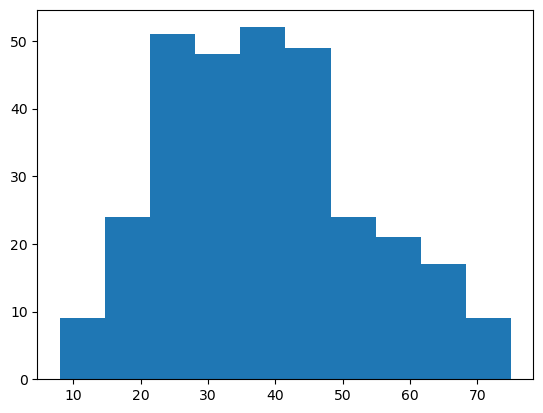

In [58]:
plt.hist(y)
plt.show()

### 1. Threshold - [ y_t ]

In [59]:
threshold=60
over_t = []
for i in y:
    if i>threshold:
        over_t.append(i)
print(len(over_t))
print(over_t)

31
[69, 61, 61, 64, 64, 65, 73, 65, 64, 68, 72, 68, 62, 71, 66, 61, 75, 69, 69, 61, 66, 65, 72, 64, 65, 66, 61, 65, 70, 63, 64]


In [60]:
y_t = np.asarray([i>threshold for i in y]).astype('int')
print(y_t)

[0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 1 0 0 1 0 0 0 0]


### 2. Top K% - [ y_k ]

In [61]:
k = 20
cnt = int(k/100*len(y))
temp = np.sort(y)[::-1]
temp = temp[:cnt]
min_val = temp[-1]
print(min_val)

51


In [62]:
y_k = np.asarray([i>=min_val for i in y]).astype('int')
print(y_k)

[0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 1 0 0 1 0 0 0 0]


### 3. Decide what to use

In [63]:
#y = y_t
y = y_k

# Find Hyperparam & Train

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [65]:
params = {
    'max_depth': [2, 3, 4, 5, 6, 7],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

In [66]:
clf = RandomForestClassifier()
grid_tree = GridSearchCV(clf, param_grid=params, cv=3, refit=True)
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [67]:
em = grid_tree.best_estimator_
print(em)

RandomForestClassifier(max_depth=6, min_samples_split=6)


# MLP

In [76]:
params2 = {
    'learning_rate': ["constant", "invscaling", "adaptive"],
    'hidden_layer_sizes': [(2,), (3,), (4,), (5, ), (2, 1), (3, 1), (3, 1), (4, 1), (5, 1)],
    'activation': ["logistic", "relu", "Tanh"]
}

In [78]:
clf2 = MLPClassifier()
grid_mlp = GridSearchCV(clf2, param_grid=params2, cv=3, refit=True)
grid_mlp.fit(X_train, y_train)

/home/jameslee/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jameslee/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jameslee/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jameslee/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jameslee/anaconda3/lib/pyt

/home/jameslee/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jameslee/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jameslee/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jameslee/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jameslee/anaconda3/lib/pyt

/home/jameslee/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jameslee/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jameslee/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jameslee/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jameslee/anaconda3/lib/pyt

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu', 'Tanh'],
                         'hidden_layer_sizes': [(2,), (3,), (4,), (5,), (2, 1),
                                                (3, 1), (3, 1), (4, 1),
                                                (5, 1)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive']})

In [79]:
em2 = grid_mlp.best_estimator_
print(em2)

MLPClassifier(activation='logistic', hidden_layer_sizes=(4,))


# Prediction & Metrics

In [68]:
prediction = em.predict(X_test)
confidence = em.predict_proba(X_test)
score = em.score(X_test, y_test)
print("Accuracy: "+str(score))

Accuracy: 0.819672131147541


In [81]:
prediction2 = em2.predict(X_test)
confidence2 = em2.predict_proba(X_test)
score2 = em2.score(X_test, y_test)
print("Accuracy: "+str(score2))

Accuracy: 0.819672131147541


In [69]:
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
print("Precision: "+str(precision))
print("Recall: "+str(recall))

Precision: 0.0
Recall: 0.0


/home/jameslee/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
precision = precision_score(y_test, prediction2)
recall = recall_score(y_test, prediction2)
print("Precision: "+str(precision))
print("Recall: "+str(recall))

Precision: 0.0
Recall: 0.0


/home/jameslee/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
print(y_test)

[0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0]


In [83]:
print(prediction)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [84]:
print(prediction2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
